In [36]:
import numpy as np
inf=float("inf")

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats as st

import stablerank.srank as sr
import stablerank.geometry_objects_2020 as ge

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import _pickle as pickle
import csv

from ripser import ripser
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from PIL import Image
from ast import literal_eval
import matplotlib

matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")

matplotlib.rc("text.latex", preamble=r"""
\usepackage{amsmath,amssymb,amsfonts}
\usepackage{bm}
\DeclareMathOperator{\newdiff}{d} % use \dif instead
\newcommand{\dif}{\newdiff\!} %the correct way to do derivatives
\newcommand{\bigoh}{\mathcal{O}}
\makeatletter
\let\oldabs\abs
\def\abs{\@ifstar{\oldabs}{\oldabs*}}
\newcommand\norm[1]{\left\lVert#1\right\rVert}
""")

### Import Training Data - Option 1

In [4]:
#df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv', sep=',')
df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv', sep=',')

In [5]:
# Removing duplicate values and reindexing
df.drop_duplicates(subset =["pixels"], inplace = True)
df=df.reindex(range(0,len(df)-1))

### Import Test Data - Option 2

In [4]:
df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv', sep=',')

In [5]:
# Removing duplicate values and reindexing
df.drop_duplicates(subset =["pixels"], inplace = True)
df=df.reindex(range(0,len(df)-1))

## Try for one image

In [6]:
# Take the first picture as an example
pixel_values = [int(numeric_string) for numeric_string in df["pixels"][3].split(' ')]

image_dummy = np.empty((48*48,3), int)
for i in range(0,len(image_dummy)):
    image_dummy[i] = [(100/47)*(i-i%48)/48, (100/47)*(i%48), (100/47)*(47*pixel_values[i]/255)]

image_stacked = np.vstack(image_dummy)
image = sr.EucObject(image_stacked)

In [7]:
index = 300
degree="H1"
md=1

# Compute the stable rank as above
pixel_values_ti = [int(numeric_string) for numeric_string in df["pixels"][index].split(' ')]
image_dummy_ti = np.empty((48*48,3), int)
for i in range(0,len(image_dummy_ti)):
    image_dummy_ti[i] = [(100/47)*(i-i%48)/48, (100/47)*(i%48), (100/47)*(47*pixel_values_ti[i]/255)]

image_stacked_ti = np.vstack(image_dummy_ti)
image_ti = sr.EucObject(image_stacked_ti)

b_ti = image.get_bc(maxdim=md)
S_ti = sr.bc_to_sr(b_ti, degree)

content = S_ti.content

contents_1 = []
contents_1.append(content[0])

contents_2 = []
contents_2.append(content[1])

indeces = []
indeces.append(index)

data_test = {'old index':indeces, 'content 1':contents_1, 'content 2':contents_2}
df_out_test = pd.DataFrame(data_test)

In [8]:
df_out_test.to_csv("Results/test.csv")

In [31]:
df_angry_h0=pd.read_csv("Results/angry_100images_H0.csv")
df_disgust_h0=pd.read_csv("Results/disgust_100images_H0.csv")
df_fear_h0=pd.read_csv("Results/fear_100images_H0.csv")
df_happy_h0=pd.read_csv("Results/happy_100images_H0.csv")
df_sad_h0=pd.read_csv("Results/sad_100images_H0.csv")
df_surprise_h0=pd.read_csv("Results/surprise_100images_H0.csv")
df_neutral_h0=pd.read_csv("Results/neutral_100images_H0.csv")

dict_h0 = dict([('Angry', df_angry_h0), ('Disgust', df_disgust_h0), ('Fear', df_fear_h0), 
               ('Happy', df_happy_h0), ('Sad', df_sad_h0), ('Surprise', df_surprise_h0),
               ('Neutral', df_neutral_h0)])

df_angry_h1=pd.read_csv("Results/angry_100images_H1.csv")
df_disgust_h1=pd.read_csv("Results/disgust_100images_H1.csv")
df_fear_h1=pd.read_csv("Results/fear_100images_H1.csv")
df_happy_h1=pd.read_csv("Results/happy_100images_H1.csv")
df_sad_h1=pd.read_csv("Results/sad_100images_H1.csv")
df_surprise_h1=pd.read_csv("Results/surprise_100images_H1.csv")
df_neutral_h1=pd.read_csv("Results/neutral_100images_H1.csv")

dict_h1 = dict([('Angry', df_angry_h1), ('Disgust', df_disgust_h1), ('Fear', df_fear_h1), 
               ('Happy', df_happy_h1), ('Sad', df_sad_h1), ('Surprise', df_surprise_h1),
               ('Neutral', df_neutral_h1)])

### Reconstructing the PCNIF from the content

In [28]:
c1_temp = dict_h0["Angry"]["content 1"][0]
c1 = [float(x) for x in c1_temp[1:-1].split()]
c2_temp = dict_h0["Angry"]["content 2"][0]
c2 = [float(x) for x in c2_temp[1:-1].split()]
ce = [c1, c2]
#### Result
res = sr.Pcnif(ce)

## plot average stable ranks

In [19]:
len(df_reload)

100

In [38]:
# Color code and select emotion categories
emotion_categories = [0,1,2,3,4,5,6]
#emotion_categories = [1,3]
emotion_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
colors=["red","blue","yellow","orange","green","black","purple"]

plt.figure(figsize=(10,10))

for e in emotion_categories:
    emotion_name = emotion_names[e]
    tot_pcf = 0
    df_reload = dict_h0[emotion_name]
    for i in range(len(df_reload)):
        c1_temp = df_reload["content 1"][0]
        c1 = [float(x) for x in c1_temp[1:-1].split()]
        c2_temp = df_reload["content 2"][0]
        c2 = [float(x) for x in c2_temp[1:-1].split()]
        ce = [c1, c2]
        #### Result
        pcf = sr.Pcnif(ce)
        tot_pcf = tot_pcf + pcf
    ave_pcf = tot_pcf*(1/len(df_reload))
    ave_pcf.plot(color = colors[e])
plt.legend(emotion_names)
plt.title('$H_0$ stable rank')
plt.savefig("H0stablerank_embedding1.pdf")
os.system('pdfcrop %s %s' % ("H0stablerank_embedding1.pdf", "H0stablerank_embedding1.pdf"))
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 720x720 with 1 Axes>

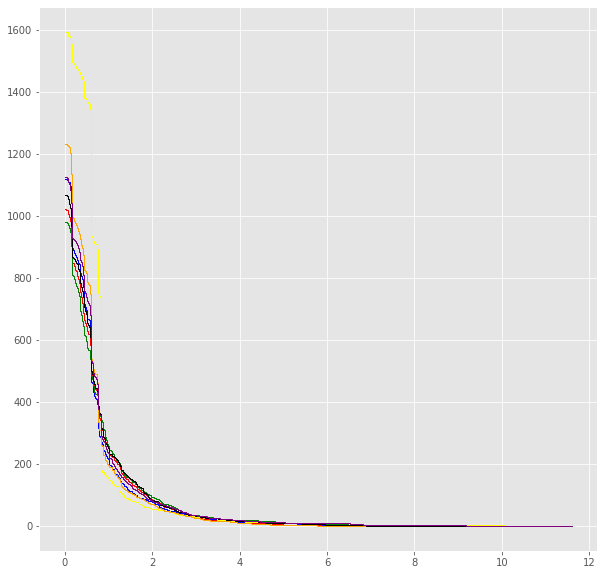

In [34]:
# Color code and select emotion categories
emotion_categories = [0,1,2,3,4,5,6]
#emotion_categories = [1,3]
emotion_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
colors=["red","blue","yellow","orange","green","black","purple"]

plt.figure(figsize=(10,10))

for e in emotion_categories:
    emotion_name = emotion_names[e]
    tot_pcf = 0
    df_reload = dict_h1[emotion_name]
    for i in range(len(df_reload)):
        c1_temp = df_reload["content 1"][0]
        c1 = [float(x) for x in c1_temp[1:-1].split()]
        c2_temp = df_reload["content 2"][0]
        c2 = [float(x) for x in c2_temp[1:-1].split()]
        ce = [c1, c2]
        #### Result
        pcf = sr.Pcnif(ce)
        tot_pcf = tot_pcf + pcf
    ave_pcf = tot_pcf*(1/len(df_reload))
    ave_pcf.plot(color = colors[e])

## Exporting for one emotion

In [39]:
# Selecting one emotion
e = 3
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

# specifying the number of pictures for subsampling
number_of_pictures = 100

# select homology and maxdim
degree="H0"
md=0

# Set up empty arrays for the indices and contents
indices = []
contents_1 = []
contents_2 = []

# Select random images for subsampling for emotion e
pos = np.array(np.where(df["emotion"]==e))[0]
rand_pos = pos[list(np.random.permutation(np.arange(0,len(pos)-1))[:number_of_pictures])]
    
# Calculate stable ranks
for l in range(0,number_of_pictures):
    pixel_values_it = [int(numeric_string) for numeric_string in df["pixels"][rand_pos[l]].split(' ')]
    image_dummy_it = np.empty((48*48,3), int)
    for i in range(0,len(image_dummy_it)):
        image_dummy_it[i] = [(100/47)*(i-i%48)/48, (100/47)*(i%48), (100/47)*(47*pixel_values_it[i]/255)]

    image_stacked_it = np.vstack(image_dummy_it)
    image_it = sr.EucObject(image_stacked_it)

    b_it = image_it.get_bc(maxdim=md)
    S_it = sr.bc_to_sr(b_it, degree)
    
    content = S_it.content
    
    indices.append(rand_pos[l])
    contents_1.append(content[0])
    contents_2.append(content[1])
    
data = {'old index':indices, 'content 1':contents_1, 'content 2':contents_2}
df_out = pd.DataFrame(data)
df_out.to_csv("Results/")